# Project: Investigate a Dataset - No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### The dataset is a collection of medical appointments for 100k patients in Brasil. The dataset include the geographic location of patients, age, gender, appointment date,other medical cinditions and whether or not a patient showed up on their scheduled date. It also inludes the patient ID for each patient, appointment ID,and a column for patients that have access to medical scholarships. "No" in the no_show colunm indicates that a patient was present while "Yes" indicates that a patient was absent.



### Question(s) for Analysis 
#### 1. Gender with the highest attendance rate.
#### 2. What Features are important to predict if a patient will be present or absent. 
#### 3. Age distribution of people with access to medical scholarship.

In [1]:
#Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
#load dataset and view a few rows
df_doc_appt = pd.read_csv('doctors_appointments.csv')
df_doc_appt.head(3)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62    MATA DA PRAIA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No

### General Properties


In [3]:
#Know the size of the data by getting its shape
df_doc_appt.shape

(110527, 14)

In [4]:
#check for duplicates
sum(df_doc_appt.duplicated())

0

In [5]:
#view general information about data set
df_doc_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Statistical description of data
df_doc_appt.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [7]:
df_doc_appt['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [8]:
df_doc_appt['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

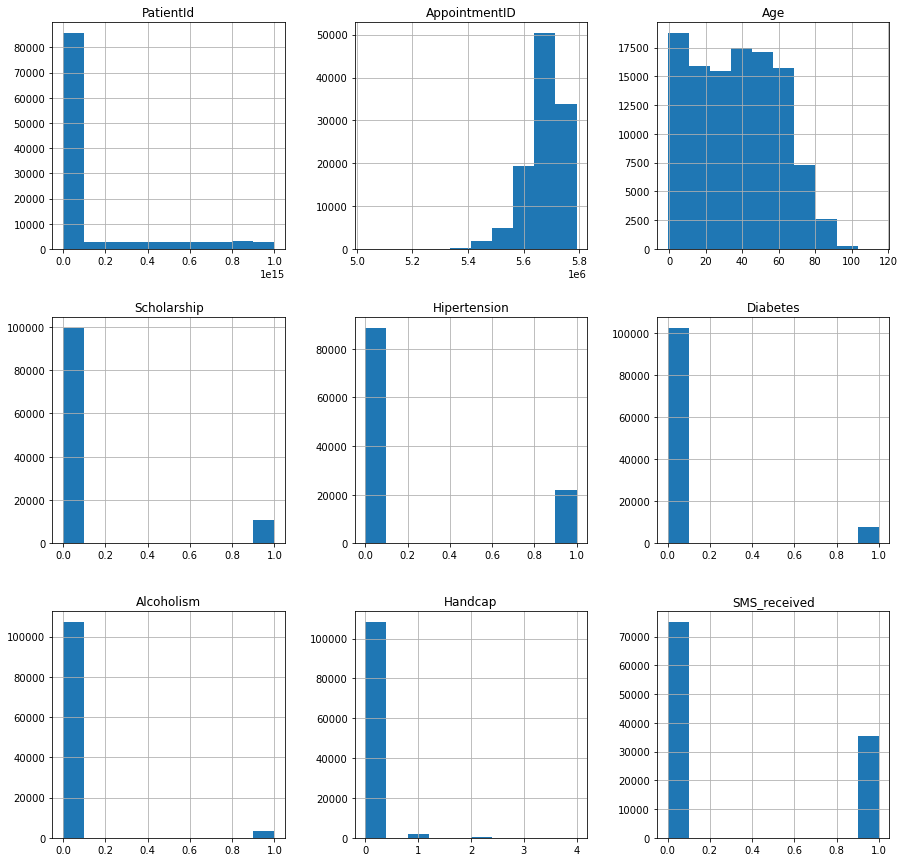

In [9]:
df_doc_appt.hist(figsize = (15,15));


### Data Cleaning

#### There are no null values in the data as seen from the general information, and the data does not also have duplicates. The schedule day and appointment day columns contains same data although the schedule day is more complete as it captures time, therefore i would be dropping the the appointmentday colunm. I would also be dropping the patient ID and appointment ID colunm as they would not be used in the analysis.

#### The scheduledday is having a wrong format 'string', this would be corrected to datetime, also the summary statistics reveals some in approiprate data for the age and handicap columns, this would also need to be corrected. The 'handicap' and no-show column names will also be renamed for consistency.

In [10]:
#drop columns not relevant to the analysis
df_doc_appt.drop(['PatientId','AppointmentID','AppointmentDay'], axis = 1, inplace = True)

In [11]:
#Rename columns to lower case for consistency
df_doc_appt.rename(columns = lambda x : x.lower().replace("-","_"),inplace = True)
df_doc_appt.rename(columns = {'handcap':'handicap'},inplace = True)

In [12]:
#confirm changes from code above
df_doc_appt.head()

gender          scheduledday  age      neighbourhood  scholarship  \
0      F  2016-04-29T18:38:08Z   62    JARDIM DA PENHA            0   
1      M  2016-04-29T16:08:27Z   56    JARDIM DA PENHA            0   
2      F  2016-04-29T16:19:04Z   62      MATA DA PRAIA            0   
3      F  2016-04-29T17:29:31Z    8  PONTAL DE CAMBURI            0   
4      F  2016-04-29T16:07:23Z   56    JARDIM DA PENHA            0   

   hipertension  diabetes  alcoholism  handicap  sms_received no_show  
0             1         0           0         0             0      No  
1             0         0           0         0             0      No  
2             0         0           0         0             0      No  
3             0         0           0         0             0      No  
4             1         1           0         0             0      No

In [13]:
#View new size of the dataframe
df_doc_appt.shape

(110527, 11)

In [14]:
#replace inapproipate values in the handicap column
df_doc_appt['handicap'].replace([2,3,4],1,inplace = True)

In [15]:
#import datetime module to convert scheduledday to appropriate datatype
from datetime import datetime

In [16]:
df_doc_appt['scheduledday'] = pd.to_datetime(df_doc_appt['scheduledday'])

In [17]:
#confirm changes made
df_doc_appt.info()
df_doc_appt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   gender         110527 non-null  object             
 1   scheduledday   110527 non-null  datetime64[ns, UTC]
 2   age            110527 non-null  int64              
 3   neighbourhood  110527 non-null  object             
 4   scholarship    110527 non-null  int64              
 5   hipertension   110527 non-null  int64              
 6   diabetes       110527 non-null  int64              
 7   alcoholism     110527 non-null  int64              
 8   handicap       110527 non-null  int64              
 9   sms_received   110527 non-null  int64              
 10  no_show        110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 9.3+ MB


gender              scheduledday  age      neighbourhood  scholarship  \
0      F 2016-04-29 18:38:08+00:00   62    JARDIM DA PENHA            0   
1      M 2016-04-29 16:08:27+00:00   56    JARDIM DA PENHA            0   
2      F 2016-04-29 16:19:04+00:00   62      MATA DA PRAIA            0   
3      F 2016-04-29 17:29:31+00:00    8  PONTAL DE CAMBURI            0   
4      F 2016-04-29 16:07:23+00:00   56    JARDIM DA PENHA            0   

   hipertension  diabetes  alcoholism  handicap  sms_received no_show  
0             1         0           0         0             0      No  
1             0         0           0         0             0      No  
2             0         0           0         0             0      No  
3             0         0           0         0             0      No  
4             1         1           0         0             0      No

#### From the review above, age contains inappropriate value '0' and '-1'. Reviewing the properties would determine if the rows with this information can be dropped or not.

In [18]:
#The count of the rows with '0' as age
df_doc_appt.query('age == 0').count()

gender           3539
scheduledday     3539
age              3539
neighbourhood    3539
scholarship      3539
hipertension     3539
diabetes         3539
alcoholism       3539
handicap         3539
sms_received     3539
no_show          3539
dtype: int64

In [19]:
#Assign the df to a new dataframe
df_zero_age = df_doc_appt.query('age == 0')

In [20]:
#review a sample of the data
df_zero_age.head()

gender              scheduledday  age      neighbourhood  scholarship  \
59      F 2016-04-29 08:08:43+00:00    0          CONQUISTA            0   
63      M 2016-04-27 10:46:12+00:00    0       SÃO BENEDITO            0   
64      M 2016-04-25 13:28:21+00:00    0  ILHA DAS CAIEIRAS            0   
65      M 2016-04-27 10:48:50+00:00    0          CONQUISTA            0   
67      F 2016-04-29 08:53:02+00:00    0     NOVA PALESTINA            0   

    hipertension  diabetes  alcoholism  handicap  sms_received no_show  
59             0         0           0         0             0      No  
63             0         0           0         0             0      No  
64             0         0           0         0             1      No  
65             0         0           0         0             0      No  
67             0         0           0         0             0      No

In [21]:
df_zero_age.sample(10)

gender              scheduledday  age   neighbourhood  scholarship  \
37370       M 2016-05-18 09:32:50+00:00    0  FORTE SÃO JOÃO            0   
82676       F 2016-05-20 13:04:55+00:00    0         ITARARÉ            0   
76596       M 2016-05-16 07:11:43+00:00    0       CARATOÍRA            0   
37339       M 2016-04-13 07:51:22+00:00    0           ROMÃO            0   
81853       M 2016-04-18 15:14:08+00:00    0         ITARARÉ            0   
28326       M 2016-04-25 14:29:11+00:00    0        REDENÇÃO            0   
85131       M 2016-06-06 08:35:51+00:00    0         PIEDADE            0   
110343      F 2016-05-12 10:43:50+00:00    0     RESISTÊNCIA            0   
37278       F 2016-04-07 07:59:39+00:00    0  FORTE SÃO JOÃO            0   
42611       F 2016-04-29 14:16:06+00:00    0          JABOUR            0   

        hipertension  diabetes  alcoholism  handicap  sms_received no_show  
37370              0         0           0         0             0      No  
82676              0         0           0         0             0      No  
76596              0         0           0         0             0     Yes  
37339              0         0           0         0             1      No  
81853              0         0           0         0             0      No  
28326              0         0           0         0             0     Yes  
85131              0         0           0         0             0      No  
110343             0         0           0         0             1      No  
37278              0         0           0         0             1      No  
42611              0         0           0         0             1      No

In [22]:
df_zero_age.groupby(['no_show','gender']).count()

scheduledday   age  neighbourhood  scholarship  hipertension  \
no_show gender                                                                 
No      F               1402  1402           1402         1402          1402   
        M               1498  1498           1498         1498          1498   
Yes     F                319   319            319          319           319   
        M                320   320            320          320           320   

                diabetes  alcoholism  handicap  sms_received  
no_show gender                                                
No      F           1402        1402      1402          1402  
        M           1498        1498      1498          1498  
Yes     F            319         319       319           319  
        M            320         320       320           320

#### A sizeable number of the entries had zero has age and were present for their appointments,dropping them might affect the quality of the analysis. Hence we would be replacing the values with the mean age values for the purpose of this analysis.

In [23]:
#Replace the inapropriate values with the mean and round to ensure age is a whole figure
mean_age = df_doc_appt['age'].mean()
df_doc_appt['age'].replace([0,-1],mean_age,inplace = True)
df_doc_appt['age'] = df_doc_appt['age'].round()

In [24]:
#Review the corrections
df_doc_appt['age'].unique()
df_doc_appt['age'].nunique()

102

In [25]:
df_doc_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   gender         110527 non-null  object             
 1   scheduledday   110527 non-null  datetime64[ns, UTC]
 2   age            110527 non-null  float64            
 3   neighbourhood  110527 non-null  object             
 4   scholarship    110527 non-null  int64              
 5   hipertension   110527 non-null  int64              
 6   diabetes       110527 non-null  int64              
 7   alcoholism     110527 non-null  int64              
 8   handicap       110527 non-null  int64              
 9   sms_received   110527 non-null  int64              
 10  no_show        110527 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(6), object(3)
memory usage: 9.3+ MB


#### Age format is now a float and needs to be converted to an int for uniformity

In [26]:
df_doc_appt['age'] = df_doc_appt.age.astype(int)

In [27]:
#confirm changes
df_doc_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   gender         110527 non-null  object             
 1   scheduledday   110527 non-null  datetime64[ns, UTC]
 2   age            110527 non-null  int32              
 3   neighbourhood  110527 non-null  object             
 4   scholarship    110527 non-null  int64              
 5   hipertension   110527 non-null  int64              
 6   diabetes       110527 non-null  int64              
 7   alcoholism     110527 non-null  int64              
 8   handicap       110527 non-null  int64              
 9   sms_received   110527 non-null  int64              
 10  no_show        110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(6), object(3)
memory usage: 8.9+ MB


In [28]:
df_doc_appt.head()

gender              scheduledday  age      neighbourhood  scholarship  \
0      F 2016-04-29 18:38:08+00:00   62    JARDIM DA PENHA            0   
1      M 2016-04-29 16:08:27+00:00   56    JARDIM DA PENHA            0   
2      F 2016-04-29 16:19:04+00:00   62      MATA DA PRAIA            0   
3      F 2016-04-29 17:29:31+00:00    8  PONTAL DE CAMBURI            0   
4      F 2016-04-29 16:07:23+00:00   56    JARDIM DA PENHA            0   

   hipertension  diabetes  alcoholism  handicap  sms_received no_show  
0             1         0           0         0             0      No  
1             0         0           0         0             0      No  
2             0         0           0         0             0      No  
3             0         0           0         0             0      No  
4             1         1           0         0             0      No

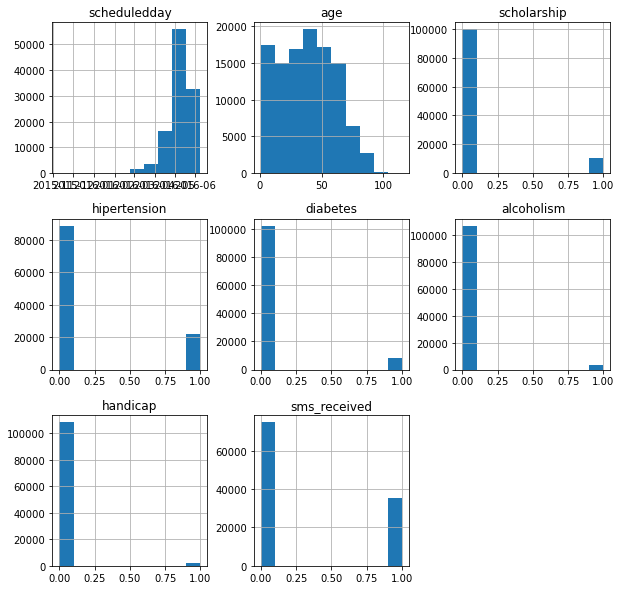

In [29]:
df_doc_appt.hist(figsize = (10,10));

In [30]:
df_doc_appt.describe()

age    scholarship   hipertension       diabetes  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean       38.273933       0.098266       0.197246       0.071865   
std        22.104720       0.297675       0.397921       0.258265   
min         1.000000       0.000000       0.000000       0.000000   
25%        20.000000       0.000000       0.000000       0.000000   
50%        37.000000       0.000000       0.000000       0.000000   
75%        55.000000       0.000000       0.000000       0.000000   
max       115.000000       1.000000       1.000000       1.000000   

          alcoholism       handicap   sms_received  
count  110527.000000  110527.000000  110527.000000  
mean        0.030400       0.020276       0.321026  
std         0.171686       0.140942       0.466873  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       1.000000  
max         1.000000       1.000000       1.000000

<a id='eda'></a>
## Exploratory Data Analysis

#### For easier analysis i would creating a colunm for age distribution, this would help keep the analysis clean and compact

In [31]:
#create an age range to better capture the age distribution
bin_edges = [1,18,40,65,115]
bin_names = ['young','adult','elderly','old']
df_doc_appt['age_distribution'] =pd.cut(df_doc_appt['age'],bin_edges,labels = bin_names)

In [32]:
df_doc_appt.head()

gender              scheduledday  age      neighbourhood  scholarship  \
0      F 2016-04-29 18:38:08+00:00   62    JARDIM DA PENHA            0   
1      M 2016-04-29 16:08:27+00:00   56    JARDIM DA PENHA            0   
2      F 2016-04-29 16:19:04+00:00   62      MATA DA PRAIA            0   
3      F 2016-04-29 17:29:31+00:00    8  PONTAL DE CAMBURI            0   
4      F 2016-04-29 16:07:23+00:00   56    JARDIM DA PENHA            0   

   hipertension  diabetes  alcoholism  handicap  sms_received no_show  \
0             1         0           0         0             0      No   
1             0         0           0         0             0      No   
2             0         0           0         0             0      No   
3             0         0           0         0             0      No   
4             1         1           0         0             0      No   

  age_distribution  
0          elderly  
1          elderly  
2          elderly  
3            young  
4          elderly

In [33]:
#Define a function to plot my bar chart
def plot_bar(count,title,xlabel,ylabel,ticks,labels):
    plt.xticks(ticks,labels)
    return count.plot.bar(xticks = ticks,title = title,xlabel = xlabel,ylabel =ylabel)

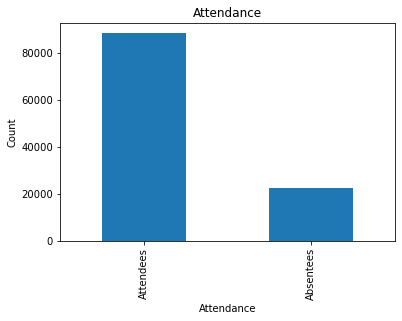

In [34]:
labels = ['Attendees','Absentees']
xlabel = 'Attendance'
ylabel = 'Count'
title = 'Attendance'
ticks = [0,1]
count = df_doc_appt.no_show.value_counts()
plot_bar(count,title,xlabel,ylabel,ticks,labels);

#### The plot above reveals that more people attended their appointment.

#### I would be reviewing how 'gender','age' and 'scholarship' contributes to this.

#### Q1. Gender with the highest attendance rate.

In [35]:
#accessing how gender influences the attendance
df_doc_appt.groupby('no_show')['gender'].value_counts()

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: gender, dtype: int64

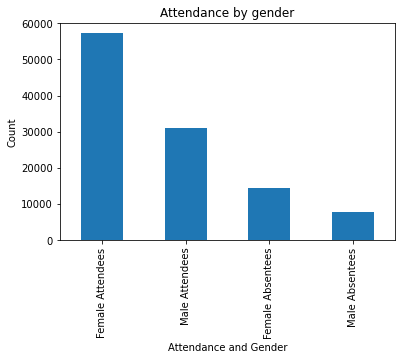

In [36]:
labels = ['Female Attendees','Male Attendees','Female Absentees','Male Absentees']
xlabel = 'Attendance and Gender'
ylabel = 'Count'
title = 'Attendance by gender'
ticks = [0,1,2,3]
count = df_doc_appt.groupby('no_show')['gender'].value_counts()
plot_bar(count,title,xlabel,ylabel,ticks,labels);

#### The plot above reveals that we have more female attendees than mail attendees, but also more female absentees than male absentees. Looking at the count we can see that we have a considerably higher amount of females compared to males, this might be a reason for the result above.

#### To have clearer inference i will be looking at the proportions of attendendance and absentism for each gender. This may also be the case for other features,therefore i'd be creating a function for this.

#### Q2. What Features are important to predict if a patient will be present or absent

In [37]:
#Functions declaratio for proportions and proportions plot.
def proportions(count,totals):
    return count/totals
def plot_prop_bar(value,ticks,labels,xlabel,ylabel,title):
    plt.xticks(ticks,labels)
    return value.plot.bar(xticks= ticks,title = title,color = colors,alpha = 0.5,xlabel =xlabel,ylabel=ylabel);

In [38]:
gender_count = df_doc_appt.groupby(['no_show','gender']).count()['handicap']

In [39]:
gender_totals = df_doc_appt.groupby('gender').count()['handicap']

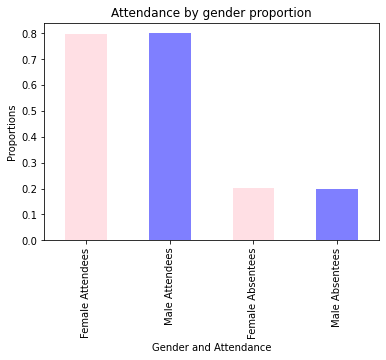

In [40]:
colors = ['pink','blue']
labels = ['Female Attendees','Male Attendees','Female Absentees','Male Absentees']
ticks = [0,1,2,3]
xlabel = 'Gender and Attendance'
ylabel = 'Proportions'
title = 'Attendance by gender proportion'
value = proportions(gender_count,gender_totals)
plot_prop_bar(value,ticks,labels,xlabel,ylabel,title);

#### The plot above shows that gender might not be a good indictaor of whether a patient would show or not, as the proportions related to the total are closely tied.

In [41]:
#accessing scholarship against attendance
df_doc_appt.groupby('scholarship')['no_show'].value_counts()

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

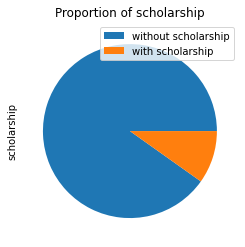

In [42]:
df_doc_appt.scholarship.value_counts().plot(kind = 'pie',legend = True,labeldistance = None,title = 'Proportion of scholarship', labels = ['without scholarship','with scholarship']);

#### The pie chart above shows that less people have access to scholarship.

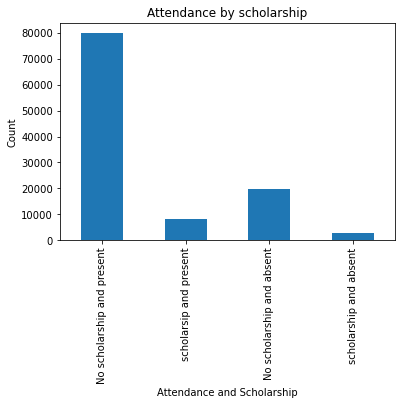

In [43]:
labels = ['No scholarship and present','scholarsip and present','No scholarship and absent','scholarship and absent']
xlabel = 'Attendance and Scholarship'
ylabel = 'Count'
title = 'Attendance by scholarship'
ticks = [0,1,2,3]
count = df_doc_appt.groupby('no_show')['scholarship'].value_counts()
plot_bar(count,title,xlabel,ylabel,ticks,labels);

In [44]:
scholarship_count = df_doc_appt.groupby(['no_show','scholarship']).count()['handicap']
scholarship_totals = df_doc_appt.groupby('scholarship').count()['handicap']

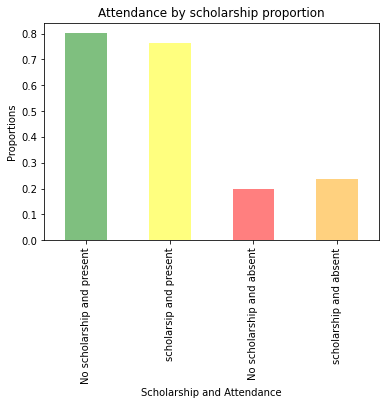

In [45]:
colors = ['green','yellow','red','orange']
labels = ['No scholarship and present','scholarsip and present','No scholarship and absent','scholarship and absent']
ticks = [0,1,2,3]
xlabel = 'Scholarship and Attendance'
ylabel = 'Proportions'
title = 'Attendance by scholarship proportion'
value = proportions(scholarship_count,scholarship_totals)
plot_prop_bar(value,ticks,labels,xlabel,ylabel,title);

#### Both charts above indicates that patient without scholarships are more likely to appear for their appointments while patients with scholarship are more likely not going to appear for their appointment.

#### I will be reviewing the age distribution as an indication of attendance.

In [46]:
#group by age distribution 
df_doc_appt.groupby('age_distribution')['no_show'].value_counts()

age_distribution  no_show
young             No         17761
                  Yes         5293
adult             No         27343
                  Yes         8014
elderly           No         30011
                  Yes         6531
old               No         11235
                  Yes         2066
Name: no_show, dtype: int64

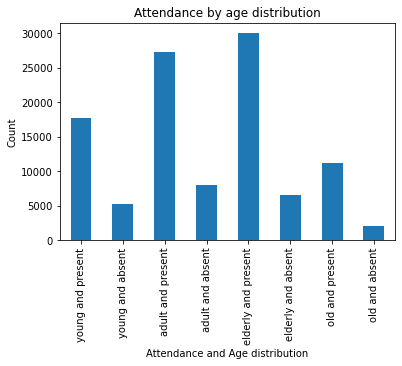

In [47]:
labels = ['young and present','young and absent','adult and present','adult and absent','elderly and present','elderly and absent','old and present','old and absent']
xlabel = 'Attendance and Age distribution'
ylabel = 'Count'
title = 'Attendance by age distribution'
ticks = [0,1,2,3,4,5,6,7]
count = df_doc_appt.groupby('age_distribution')['no_show'].value_counts()
plot_bar(count,title,xlabel,ylabel,ticks,labels);

#### The chart depicts that the elderly are most likely to show up, however we could also look at the data proportions to see the data differently

In [48]:
age_distribution_count = df_doc_appt.groupby(['no_show','age_distribution']).count()['handicap']
age_distribution_totals = df_doc_appt.groupby('age_distribution').count()['handicap']

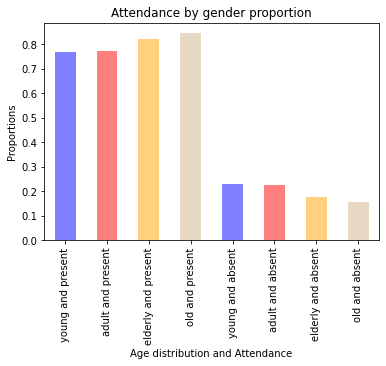

In [49]:
colors = ['blue','red','orange','tan']
labels = ['young and present','adult and present','elderly and present','old and present','young and absent','adult and absent','elderly and absent','old and absent']
ticks = [0,1,2,3,4,5,6,7]
xlabel = 'Age distribution and Attendance'
ylabel = 'Proportions'
title = 'Attendance by gender proportion'
value = proportions(age_distribution_count,age_distribution_totals)
plot_prop_bar(value,ticks,labels,xlabel,ylabel,title);

#### This shows that in relation to the number of person present within each age group, the patient within the Old age group are most likely to attend their appointments, while the people within the young age group are most likely not going to show for their appointments compared to other age groups

#### Q3.  Age distribution of people with access to medical scholarship.

#### I would be looking at the group that has the highest number of patient with access to scholarship

In [50]:
#group by age_distribution
df_doc_appt.groupby('age_distribution')['scholarship'].value_counts()

age_distribution  scholarship
young             0              19953
                  1               3101
adult             0              30819
                  1               4538
elderly           0              33653
                  1               2889
old               0              13050
                  1                251
Name: scholarship, dtype: int64

In [51]:
#Mask by patient with access to scholarship
df_s = df_doc_appt.query('scholarship == 1')

In [52]:
df_s.groupby('age_distribution')['scholarship'].value_counts()

age_distribution  scholarship
young             1              3101
adult             1              4538
elderly           1              2889
old               1               251
Name: scholarship, dtype: int64

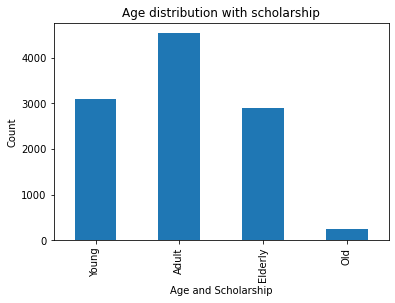

In [53]:
labels = ['Young','Adult','Elderly','Old']
xlabel = 'Age and Scholarship'
ylabel = 'Count'
title = 'Age distribution with scholarship'
ticks = [0,1,2,3]
count = df_s.groupby('age_distribution')['scholarship'].value_counts()
plot_bar(count,title,xlabel,ylabel,ticks,labels);

#### This shows that patients that belong to the adult age range have the highest number of medicals scholarships.

In [54]:
df_ws = df_doc_appt.query('scholarship == 0')

In [55]:
df_ws.groupby('age_distribution')['scholarship'].value_counts()

age_distribution  scholarship
young             0              19953
adult             0              30819
elderly           0              33653
old               0              13050
Name: scholarship, dtype: int64

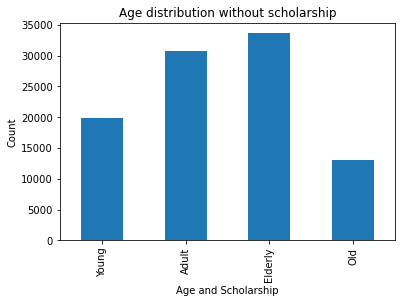

In [56]:
labels = ['Young','Adult','Elderly','Old']
xlabel = 'Age and Scholarship'
ylabel = 'Count'
title = 'Age distribution without scholarship'
ticks = [0,1,2,3]
count = df_ws.groupby('age_distribution')['scholarship'].value_counts()
plot_bar(count,title,xlabel,ylabel,ticks,labels);

#### This indicates that the patient belonging to the elderly age range have the highest number of people without  a scholarship.

<a id='conclusions'></a>
## Conclusions

#### From the analysis conducted on the given dataset, initially we lean towards believing more females show up for appointments, however this isn't totally indicative of whether gender is an important feataure to determine if a patient would show or not as the data set originally contains more female gender than male. This is apparent when we dive further using proportions which shows that the percentage of males attending from their total is closely matched with same for females. Therefore gender might not be a feature to tell if a patient shows or not, Even though the gender with most attendance are females.

#### Also from the analysis we find that most patient lack access to scholarship,however we also find that a greater percentage of people without scholarship compared to their total show for appointment, more than the percentage of those that have compared their totals. Therefore this might be a good indicator of whether a patient will show or not.

#### Another feature that may be a good indicator is the age. The patient that falls within the age range "Old" has shown in the proportions plot tend to attend their appointment more than any other age range.

#### Finally in the analysis we could find that patient within the adult age range dominate the number of people with scholarships while people in the elderly age range dominate patients without scholarships.

#### This analysis may differ if we have a closely balanced amount of both genders and if i didnt have to fill out ages with the mean age. A total of 3539 age values were zero and had to be filled with the mean age. This may have considerable effect on the outcome of the analysis. If different values were presented for the Ages in this group it may lead to an entirely different outcome.

#### If perhaps the neighbourhood were grouped into regions it may be easy to perform additional analysis to know which neighborhood dominate in terms of attendance and if lack of scholarship for certain neighborhood affected their availability.